#Import all libraries

# Author: Yuanying Li
# Purpose: Intro to Exploratory Data Analysis
#Topic:Analysis of movies industry
# Class: ALY 6015 - Lecturre #1

In [ ]:
%matplotlib inline
import operator
import numpy as np
import ast
import pandas as pd
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Introducing the TMDB 5000 movies dataset


# Acquire the data

###Note that the file was loaded via an API

In [ ]:
#https://drive.google.com/drive/u/0/folders/1zEyUt7eFFu8gNOHqGABCozutJzSoUjA-
data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRJfhu3Y4dheNjSEU6__maGqv2OHXthoqGI6Q_tL7sKVjdghzNggEvAMTi4gkYch2KD03eLjsc2FhnZ/pub?gid=1480522672&single=true&output=csv"
data_path2 ="https://docs.google.com/spreadsheets/d/e/2PACX-1vRZiz9UlPKaxUza48WW-nKAYHdMws2WK3m0FUAItDOyx6Nd7Y4DJWbUlYooFpZ_Z9aIam7LNijUB_S0/pub?gid=329001158&single=true&output=csv"
df_movie_all = pd.read_csv(data_path)
df_credit_all = pd.read_csv(data_path2)
print(df_movie_all.shape)
print(df_credit_all.shape)

(4803, 20)
(4803, 4)


In [ ]:
df_movie_all.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [ ]:
df_credit_all.head(3)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


### Data Set Information:

**These are datasets about TMDB 5000 Movies in Kaggle,there are two tables in dataset: tmbd_5000_movies and tmdb_5000_credits**

## Features description:
###  Table tmdb_5000_movies,it has:
  -  budget: The budget of each movie.
  -  genres: The genres of movie.it is divided by | , each movies has 5 genres at most. 
  -  homepage
  -  id: Each movie's id in IMDB.
  -  keywords: The keywords that are related to movie.it is divided by | , each movies has 5 keywords at most. 
  -  popularity: The relative number of views on Movie Database.
  - production companies
  - production countries
  - revenue
  - runtime countries
  - spoken language
  - vote average: The average of each movie's rating
  - vote count: The number of people give vote on a movie

### Table tmdb_5000_credits,it has:
   - Movie_id:each movie's id in IMDB.
   - Title: The name of movie
   - Cast: Every cast has its own cast_id, charactername, gender,id,real name.
   - Crew

## Data Clean up and Pre-processing

In [ ]:
# Get budget','genres', 'id', 'keywords', 'popularity','production_companies','release_date'
#'revenue','runtime','vote_average','vote_count' columns in the df_moive and get'movie_id','title','cast'
# in the df_credit and change the column name to 'id','title','cast'.
df_movie = df_movie_all [['budget','genres', 'id', 'keywords', 'popularity','release_date', 'revenue','runtime','vote_average','vote_count']]
df_credit = df_credit_all[['movie_id','title','cast','crew']]
df_credit.columns = ['id','title','cast','crew']
df_credit.head()

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
#Drop NaN datas in both datasets
df_movie.dropna(inplace=True)
df_credit.dropna(inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_movie_all["status"].value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

In [ ]:
df_movie_all.loc[(df_movie_all["vote_average"]==0)].count()

budget                  63
genres                  63
homepage                13
id                      63
keywords                63
original_language       63
original_title          63
overview                62
popularity              63
production_companies    63
production_countries    63
release_date            62
revenue                 63
runtime                 62
spoken_languages        63
status                  63
tagline                 15
title                   63
vote_average            63
vote_count              63
dtype: int64

In [ ]:
#Calculate basic statistical details like percentile, mean, std etc in movies dataset.
df_movie_clean = df_movie [['budget', 'id', 'popularity', 'revenue','runtime','vote_count']]
df_movie_clean.describe().round()

,budget,id,popularity,revenue,runtime,vote_count
count,4800.0,4800.0,4800.0,4.800000e+03,4800.0,4800.0
mean,29060068.0,56949.0,22.0,8.231205e+07,107.0,691.0
std,40730295.0,88293.0,32.0,1.628950e+08,23.0,1235.0
min,0.0,5.0,0.0,0.000000e+00,0.0,0.0
25%,800000.0,9013.0,5.0,0.000000e+00,94.0,54.0
50%,15000000.0,14624.0,13.0,1.918199e+07,103.0,236.0
75%,40000000.0,58512.0,28.0,9.293886e+07,118.0,737.0
max,380000000.0,447027.0,876.0,2.787965e+09,338.0,13752.0


In [ ]:
df_movie.nunique()

budget           435
genres          1175
id              4800
keywords        4220
popularity      4799
release_date    3279
revenue         3297
runtime          156
vote_average      71
vote_count      1609
dtype: int64

In [ ]:
df_movie_clean.loc[(df_movie_clean["revenue"]<=0) | (df_movie_clean["budget"]<=0)].count()

budget        1571
id            1571
popularity    1571
revenue       1571
runtime       1571
vote_count    1571
dtype: int64

# **# Movie data analysis results**
##1. There are 1571 movies have 0 value for budget and revenue
##2.vote- average is 0 for 62 records - to be taken into account.

##Data Visualization

### Movie data analysis

First Graph(Raw)- revenues

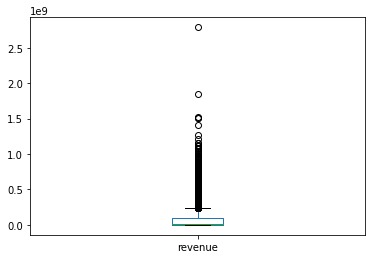

In [ ]:
# Use a box plot to see the distribution of movie revenues.
df_movie['revenue'].plot.box()

#### Prep for second graph-revenues


In [ ]:
std3 = 3*df_movie['revenue'].std()
revenue_average = df_movie['revenue'].mean()
std_max = revenue_average + std3
std_min = revenue_average - std3
df_movie = df_movie.drop(df_movie[df_movie.revenue < std_min].index
)
df_movie = df_movie.drop(df_movie[df_movie.revenue > std_max].index
)

#### Second Graph-revenues

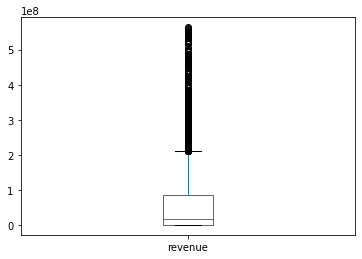

In [ ]:
# Use a box plot to
df_movie['revenue'].plot.box()


#### Third Graph-revenues

### Histogram

(array([2502.,  515.,  311.,  239.,  211.,  154.,  123.,  114.,   77.,
          68.,   55.,   42.,   34.,   41.,   29.,   30.,   34.,   15.,
          16.,   15.,   14.,   13.,    6.,   11.,   13.]),
 array([0.00000000e+00, 2.25499729e+07, 4.50999458e+07, 6.76499188e+07,
        9.01998917e+07, 1.12749865e+08, 1.35299838e+08, 1.57849810e+08,
        1.80399783e+08, 2.02949756e+08, 2.25499729e+08, 2.48049702e+08,
        2.70599675e+08, 2.93149648e+08, 3.15699621e+08, 3.38249594e+08,
        3.60799567e+08, 3.83349540e+08, 4.05899513e+08, 4.28449485e+08,
        4.50999458e+08, 4.73549431e+08, 4.96099404e+08, 5.18649377e+08,
        5.41199350e+08, 5.63749323e+08]),
 <a list of 25 Patch objects>)

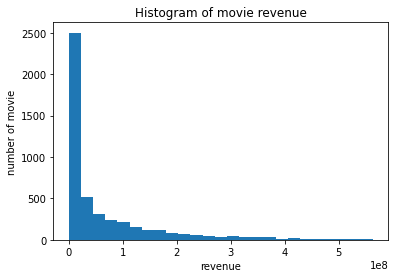

In [ ]:
# Use a histgram to plot the revenue variable
#plt.hist(np.log10(df_movie['revenue']), 25)
plt.xlabel('revenue')
plt.ylabel('number of movie')
plt.title('Histogram of movie revenue')
plt.hist(df_movie['revenue'], 25)

#### Histogram - runtime


(array([  3.,   1.,   1.,   2.,   4.,  14.,  32., 164., 358., 564., 739.,
        563., 479., 397., 412., 261., 182., 157.,  85.,  51.,  29.,  41.,
         17.,  16.,  17.]),
 array([ 41.  ,  46.28,  51.56,  56.84,  62.12,  67.4 ,  72.68,  77.96,
         83.24,  88.52,  93.8 ,  99.08, 104.36, 109.64, 114.92, 120.2 ,
        125.48, 130.76, 136.04, 141.32, 146.6 , 151.88, 157.16, 162.44,
        167.72, 173.  ]),
 <a list of 25 Patch objects>)

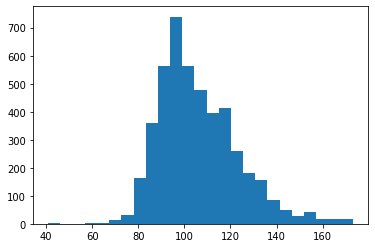

In [ ]:
#Use a histgram to plot the runtime variable, also use +/- 3 standard deviations to drop outliers.
std3 = 3*df_movie['runtime'].std()
runtime_average = df_movie['runtime'].mean()
std_max = runtime_average + std3
std_min = runtime_average - std3
df_movie = df_movie.drop(df_movie[df_movie.runtime < std_min].index)
df_movie = df_movie.drop(df_movie[df_movie.runtime > std_max].index)
plt.hist(df_movie['runtime'], 25)


#### Histogram - Vote_average

(array([ 10.,  23.,  12.,  24.,  34.,  45.,  84., 145., 145., 254., 420.,
        336., 597., 398., 592., 521., 284., 323., 157.,  61.,  51.,   8.,
          0.,   0.,   1.]),
 array([2.7  , 2.964, 3.228, 3.492, 3.756, 4.02 , 4.284, 4.548, 4.812,
        5.076, 5.34 , 5.604, 5.868, 6.132, 6.396, 6.66 , 6.924, 7.188,
        7.452, 7.716, 7.98 , 8.244, 8.508, 8.772, 9.036, 9.3  ]),
 <a list of 25 Patch objects>)

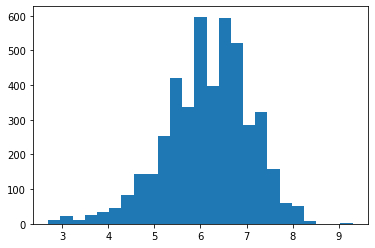

In [ ]:
# Use a histgram to plot the vote_average variable, also use +/-3 standard deviations to drop outliers.
std3 = 3*df_movie['vote_average'].std()
vote_ave_average = df_movie['vote_average'].mean()
std_max = vote_ave_average + std3
std_min = vote_ave_average - std3
df_movie = df_movie.drop(df_movie[df_movie.vote_average < std_min].index)
df_movie = df_movie.drop(df_movie[df_movie.vote_average > std_max].index)
plt.hist(df_movie['vote_average'], 25)

#### Histogram - Vote_count

(array([1776.,  627.,  453.,  304.,  223.,  157.,  148.,  114.,   84.,
          77.,   71.,   64.,   47.,   33.,   42.,   30.,   30.,   26.,
          20.,   17.,   14.,   18.,   21.,    9.,    8.]),
 array([1.00000e+00, 1.36760e+02, 2.72520e+02, 4.08280e+02, 5.44040e+02,
        6.79800e+02, 8.15560e+02, 9.51320e+02, 1.08708e+03, 1.22284e+03,
        1.35860e+03, 1.49436e+03, 1.63012e+03, 1.76588e+03, 1.90164e+03,
        2.03740e+03, 2.17316e+03, 2.30892e+03, 2.44468e+03, 2.58044e+03,
        2.71620e+03, 2.85196e+03, 2.98772e+03, 3.12348e+03, 3.25924e+03,
        3.39500e+03]),
 <a list of 25 Patch objects>)

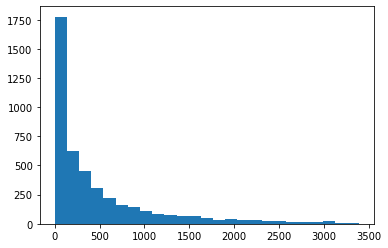

In [ ]:
# Use a histgram to plot the vote_count variable, also use +/- 3standard deviations to drop outliers.
std3 = 3*df_movie['vote_count'].std()
vote_count_average = df_movie['vote_count'].mean()
std_max = vote_count_average + std3
std_min = vote_count_average - std3
df_movie = df_movie.drop(df_movie[df_movie.vote_count < std_min].index)
df_movie = df_movie.drop(df_movie[df_movie.vote_count > std_max].index)
plt.hist(df_movie['vote_count'], 25)

#### Histogram - Popularity

(array([710., 527., 456., 382., 299., 290., 250., 203., 174., 155., 137.,
        115., 102.,  96.,  77.,  73.,  71.,  56.,  36.,  26.,  27.,  31.,
         26.,  18.,  11.]),
 array([3.72000000e-04, 2.81859760e+00, 5.63682320e+00, 8.45504880e+00,
        1.12732744e+01, 1.40915000e+01, 1.69097256e+01, 1.97279512e+01,
        2.25461768e+01, 2.53644024e+01, 2.81826280e+01, 3.10008536e+01,
        3.38190792e+01, 3.66373048e+01, 3.94555304e+01, 4.22737560e+01,
        4.50919816e+01, 4.79102072e+01, 5.07284328e+01, 5.35466584e+01,
        5.63648840e+01, 5.91831096e+01, 6.20013352e+01, 6.48195608e+01,
        6.76377864e+01, 7.04560120e+01]),
 <a list of 25 Patch objects>)

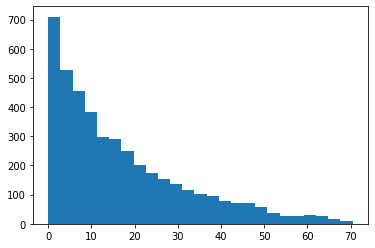

In [ ]:
# Use a histgram to plot the popularity variable, also use +/- 3standard deviations to drop outliers.
std3 = 3*df_movie['popularity'].std()
popularity_average = df_movie['popularity'].mean()
std_max = popularity_average + std3
std_min = popularity_average - std3
df_movie = df_movie.drop(df_movie[df_movie.popularity < std_min].index)
df_movie = df_movie.drop(df_movie[df_movie.popularity > std_max].index)
plt.hist(df_movie['popularity'], 25)

## Find the correlation between variables

In [ ]:
corrs = df_movie.corr(method='pearson')
print(corrs)

                budget        id  ...  vote_average  vote_count
budget        1.000000 -0.107366  ...     -0.044226    0.490076
id           -0.107366  1.000000  ...     -0.139840    0.001255
popularity    0.519671 -0.000013  ...      0.293253    0.881559
revenue       0.661400 -0.084829  ...      0.119528    0.677077
runtime       0.243977 -0.099231  ...      0.352993    0.216255
vote_average -0.044226 -0.139840  ...      1.000000    0.297938
vote_count    0.490076  0.001255  ...      0.297938    1.000000

[7 rows x 7 columns]


# **# Data analysis**
## According to what we have analyzed above, 

##1. There are 1571 movies have 0 value for budget and revenue
##2.vote- average is 0 for 62 records - to be taken into account.
## 3.We can see that vote_count has the strongest correlation with revenue of a movie.

## 4.The popularity of a movie is also highly correlated with populairty. Vote count and popularity have a really high correlation which is 0.83. Vote count contribute to the higher revenue of a movie.



In [ ]:
# Store all the movie categories and its revenue in a dictionary
category_revenue = {}
for index, row in df_movie.iterrows():
  row['genres'] = ast.literal_eval(row['genres'])
  for category in row['genres']:
    if category['name'] not in category_revenue:
      category_revenue[category['name']] = []
    category_revenue[category['name']].append(row['revenue'])
revenue_category = {}
for category, revenue in category_revenue.items():
    revenue_category[category] = revenue
sorted_category = sorted (revenue_category.items(),key = operator.itemgetter(1))

['Action', 'Adventure', 'Science Fiction', 'Fantasy', 'Western', 'Family', 'Thriller', 'Animation', 'Comedy', 'Romance', 'Crime', 'Drama', 'Horror', 'Mystery', 'War', 'History', 'Music', 'Documentary', 'Foreign', 'TV Movie']


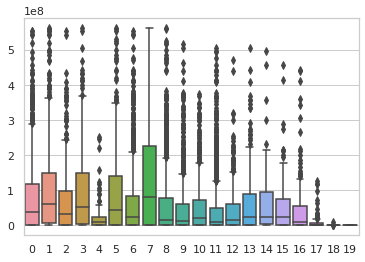

In [ ]:
# Use a box plot to see the distribution of movie category and revenue
sns.set(style="whitegrid", color_codes=True)
df_revenue_category=pd.Series(revenue_category)
sns.boxplot(data=df_revenue_category);
print([*revenue_category])

# **# Data analysis**
## By the above box plot we can see the Animation  has the highest average revenue. Although the variance is bigger, most of them concentrate in the higher revenue portion. This means, Animation are making the high revenues in general. There are less outliers for science Animation, which means Animation is the "safe" movie category that can have a higher revenue.

Refrence:

https://github.com/CTopham/TophamRepo/tree/master/Movie%20Project

https://www.learnpython.org/en/Pandas_Basics

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html
